In [1]:
%matplotlib inline
import csv
import os
import requests
import pandas as pd

In [2]:
def download_listed_companies():
    # Using publically available data from http://www.asx.com.au/asx/research/listedCompanies.do
    # This appears to be acceptable according to the current robots.txt
    req = requests.get('http://www.asx.com.au/asx/research/ASXListedCompanies.csv')
    with open('ASXListedCompanies.csv', 'w') as fh:
        fh.write(req.text)

def listed_companies():
    if not os.path.exists('ASXListedCompanies.csv'):#checks local directory if the file exists, if not, it downloads it
        download_listed_companies()

    stocknames = pd.read_csv('ASXListedCompanies.csv', skiprows=2, sep=',', quotechar='"')

    # Rename the columns to make it easier to work with the data
    stocknames.columns = ['company_name', 'asx_code', 'industry_group']
    
    return stocknames

In [3]:
stocknames = listed_companies()
stocknames

,company_name,asx_code,industry_group
0,MOQ LIMITED,MOQ,Software & Services
1,1-PAGE LIMITED,1PG,Software & Services
2,1300 SMILES LIMITED,ONT,Health Care Equipment & Services
3,1ST GROUP LIMITED,1ST,Health Care Equipment & Services
4,333D LIMITED,T3D,"Food, Beverage & Tobacco"
5,360 CAPITAL GROUP,TGP,Real Estate
6,360 CAPITAL INDUSTRIAL FUND,TIX,Real Estate
7,360 CAPITAL OFFICE FUND,TOF,Real Estate
8,360 CAPITAL TOTAL RETURN FUND,TOT,Not Applic
9,3D OIL LIMITED,TDO,Energy


## Generate a list of the current industries

This may be an indicator of why some classes of businesses perform at different scales / paces

In [33]:
s = stocknames.industry_group.unique()
s.tolist()

['Software & Services',
 'Health Care Equipment & Services',
 'Food, Beverage & Tobacco',
 'Real Estate',
 'Not Applic',
 'Energy',
 'Materials',
 'Consumer Services',
 'Semiconductors & Semiconductor Equipment',
 'Diversified Financials',
 'Retailing',
 'Pharmaceuticals & Biotechnology',
 'Media',
 'Capital Goods',
 'Automobiles & Components',
 'Commercial Services & Supplies',
 'Utilities',
 'Transportation',
 'Telecommunication Services',
 'Technology Hardware & Equipment',
 'Insurance',
 'Class Pend',
 'Household & Personal Products',
 'Consumer Durables & Apparel',
 'Banks',
 'Food & Staples Retailing']

## Open a single end-of-day data set

In [46]:
cols = ['stock', 'date', 'v1', 'v2', 'v3', 'v4', 'v5']
df = pd.read_csv('20160701.txt', names=cols)
df

,stock,date,v1,v2,v3,v4,v5
0,1AG,20160701,0.054,0.054,0.054,0.054,20000
1,1PG,20160701,0.525,0.585,0.515,0.555,3814800
2,1ST,20160701,0.054,0.055,0.051,0.055,693181
3,3PL,20160701,0.730,0.730,0.710,0.720,237056
4,88E,20160701,0.031,0.032,0.031,0.031,7645035
5,8EC,20160701,1.000,1.000,1.000,1.000,25482
6,8IH,20160701,0.790,0.805,0.790,0.795,154291
7,9SP,20160701,0.160,0.160,0.150,0.150,160119
8,A2M,20160701,1.750,1.762,1.750,1.760,3082580
9,AAA,20160701,50.090,50.090,50.080,50.080,63641


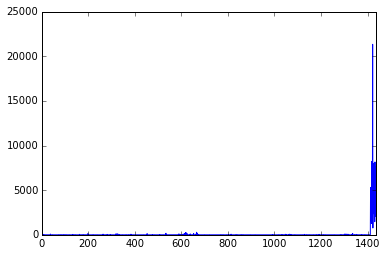

In [45]:
df.v1.plot()